#  Human mobility and COVID-19 epidemic (Rt comparision)

Student: Nguyen Xuan Tung

ID: 2005491


## Library

In [1]:
import string         #(module for string)
import sys            #(module system)
import numpy as np    #(module mathematical stuff)
import pandas as pd 
import seaborn as sns
import random 
import fileinput
import math
import operator
import scipy
import csv
import itertools
from covid19dh import covid19
import statistics

from matplotlib import pyplot as plt
from matplotlib.dates import date2num, num2date
from matplotlib import dates as mdates
from matplotlib import ticker
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.patches import Patch
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors

from scipy.stats import poisson
from scipy import stats as sps
from scipy.interpolate import interp1d

from IPython.display import clear_output

pd.options.mode.chained_assignment = None  # default='warn'

# importing the sys module
import sys 
sys.setrecursionlimit(10**6)

### ----------------------------------------------------------------------------------------------------------------

In [2]:
y = pd.read_csv('1.csv')

In [3]:
y

,id,date,confirmed,deaths,recovered,tests,vaccines,people_vaccinated,people_fully_vaccinated,hosp,...,iso_alpha_3,iso_alpha_2,iso_numeric,iso_currency,key_local,key_google_mobility,key_apple_mobility,key_jhu_csse,key_nuts,key_gadm
0,8dea749d,2021-04-27,NaN,NaN,NaN,NaN,2400.0,2400.0,NaN,NaN,...,TUV,TV,798.0,AUD,NaN,NaN,NaN,NaN,NaN,TUV
1,8dea749d,2021-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TUV,TV,798.0,AUD,NaN,NaN,NaN,NaN,NaN,TUV
2,8dea749d,2021-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TUV,TV,798.0,AUD,NaN,NaN,NaN,NaN,NaN,TUV
3,8dea749d,2021-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TUV,TV,798.0,AUD,NaN,NaN,NaN,NaN,NaN,TUV
4,8dea749d,2021-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TUV,TV,798.0,AUD,NaN,NaN,NaN,NaN,NaN,TUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159944,b2f6a333,2021-12-27,5480305.0,117066.0,NaN,27680015.0,74785702.0,37870906.0,32154334.0,NaN,...,ARG,AR,32.0,ARS,NaN,ChIJZ8b99fXKvJURqA_wKpl3Lz0,Argentina,AR,NaN,ARG
159945,b2f6a333,2021-12-28,5514207.0,117085.0,NaN,27803771.0,75644660.0,38036381.0,32414222.0,NaN,...,ARG,AR,32.0,ARS,NaN,ChIJZ8b99fXKvJURqA_wKpl3Lz0,Argentina,AR,NaN,ARG
159946,b2f6a333,2021-12-29,5556239.0,117111.0,NaN,27924922.0,NaN,NaN,NaN,NaN,...,ARG,AR,32.0,ARS,NaN,ChIJZ8b99fXKvJURqA_wKpl3Lz0,Argentina,AR,NaN,ARG
159947,b2f6a333,2021-12-30,5606745.0,117146.0,NaN,NaN,76524614.0,38189134.0,32638229.0,NaN,...,ARG,AR,32.0,ARS,NaN,ChIJZ8b99fXKvJURqA_wKpl3Lz0,Argentina,AR,NaN,ARG


In [4]:
y = y[y.iso_alpha_3=='ITA']
y

,id,date,confirmed,deaths,recovered,tests,vaccines,people_vaccinated,people_fully_vaccinated,hosp,...,iso_alpha_3,iso_alpha_2,iso_numeric,iso_currency,key_local,key_google_mobility,key_apple_mobility,key_jhu_csse,key_nuts,key_gadm
154514,03dcf038,2020-02-24,229.0,7.0,1.0,4324.0,NaN,NaN,NaN,127.0,...,ITA,IT,380.0,EUR,NaN,ChIJA9KNRIL-1BIRb15jJFz1LOI,Italy,IT,NaN,ITA
154515,03dcf038,2020-02-25,322.0,10.0,1.0,8623.0,NaN,NaN,NaN,150.0,...,ITA,IT,380.0,EUR,NaN,ChIJA9KNRIL-1BIRb15jJFz1LOI,Italy,IT,NaN,ITA
154516,03dcf038,2020-02-26,400.0,12.0,3.0,9587.0,NaN,NaN,NaN,164.0,...,ITA,IT,380.0,EUR,NaN,ChIJA9KNRIL-1BIRb15jJFz1LOI,Italy,IT,NaN,ITA
154517,03dcf038,2020-02-27,650.0,17.0,45.0,12014.0,NaN,NaN,NaN,304.0,...,ITA,IT,380.0,EUR,NaN,ChIJA9KNRIL-1BIRb15jJFz1LOI,Italy,IT,NaN,ITA
154518,03dcf038,2020-02-28,888.0,21.0,46.0,15695.0,NaN,NaN,NaN,409.0,...,ITA,IT,380.0,EUR,NaN,ChIJA9KNRIL-1BIRb15jJFz1LOI,Italy,IT,NaN,ITA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155187,03dcf038,2021-12-28,5756412.0,136943.0,5020601.0,136733800.0,109699506.0,48233850.0,46305130.0,11234.0,...,ITA,IT,380.0,EUR,NaN,ChIJA9KNRIL-1BIRb15jJFz1LOI,Italy,IT,NaN,ITA
155188,03dcf038,2021-12-29,5854428.0,137091.0,5042472.0,137763229.0,110327567.0,48294441.0,46334574.0,11763.0,...,ITA,IT,380.0,EUR,NaN,ChIJA9KNRIL-1BIRb15jJFz1LOI,Italy,IT,NaN,ITA
155189,03dcf038,2021-12-30,5981428.0,137247.0,5064718.0,138913581.0,110892589.0,48349346.0,46361416.0,12092.0,...,ITA,IT,380.0,EUR,NaN,ChIJA9KNRIL-1BIRb15jJFz1LOI,Italy,IT,NaN,ITA
155190,03dcf038,2021-12-31,6125683.0,137402.0,5087297.0,140137606.0,111163468.0,48370482.0,46372991.0,12410.0,...,ITA,IT,380.0,EUR,NaN,ChIJA9KNRIL-1BIRb15jJFz1LOI,Italy,IT,NaN,ITA


In [5]:
y = y.dropna(thresh=2)
#y

In [6]:
Infected = y['confirmed'] - y['recovered'] -  y['deaths']

In [7]:
y.insert(3,"infected",Infected)   

In [8]:
y['infected'] = y['infected']

In [9]:
y = y.filter(["date","infected","administrative_area_level_1"], axis=1)
y

,date,infected,administrative_area_level_1
154514,2020-02-24,221.0,Italy
154515,2020-02-25,311.0,Italy
154516,2020-02-26,385.0,Italy
154517,2020-02-27,588.0,Italy
154518,2020-02-28,821.0,Italy
...,...,...,...
155187,2021-12-28,598868.0,Italy
155188,2021-12-29,674865.0,Italy
155189,2021-12-30,779463.0,Italy
155190,2021-12-31,900984.0,Italy


In [10]:
name = list(y["administrative_area_level_1"].unique())

In [11]:
name

['Italy']

In [12]:
y.to_csv('y.csv')

In [13]:
# Column vector of k
k = np.arange(0, 70)[:, None]

# Different values of Lambda
lambdas = [10, 20, 30, 40]

# Evaluated the Probability Mass Function (remember: poisson is discrete)
y = sps.poisson.pmf(k, lambdas)

# Show the resulting shape
print(y.shape)

(70, 4)


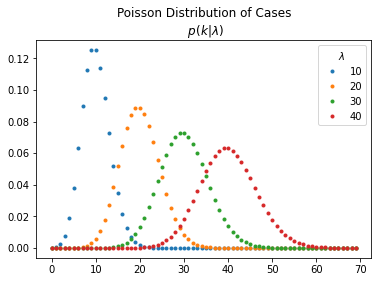

In [14]:
fig, ax = plt.subplots()

ax.set(title='Poisson Distribution of Cases\n $p(k|\lambda)$')

plt.plot(k, y,
         marker='o',
         markersize=3,
         lw=0)

plt.legend(title="$\lambda$", labels=lambdas);

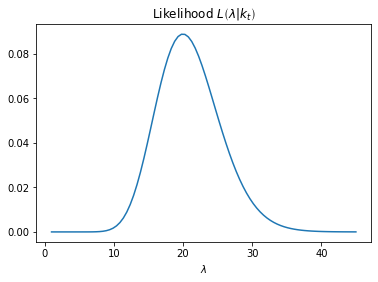

In [15]:
k = 20

lam = np.linspace(1, 45, 90)

likelihood = pd.Series(data=sps.poisson.pmf(k, lam),
                       index=pd.Index(lam, name='$\lambda$'),
                       name='lambda')

likelihood.plot(title=r'Likelihood $L\left(\lambda|k_t\right)$');

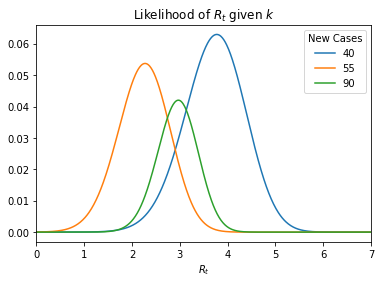

In [16]:
k = np.array([20, 40, 55, 90])

# We create an array for every possible value of Rt
R_T_MAX = 12
r_t_range = np.linspace(0, R_T_MAX, R_T_MAX*100+1)

# Gamma is 1/serial interval
# https://wwwnc.cdc.gov/eid/article/26/6/20-0357_article
GAMMA = 1/4

# Map Rt into lambda so we can substitute it into the equation below
# Note that we have N-1 lambdas because on the first day of an outbreak
# you do not know what to expect.
lam = k[:-1] * np.exp(GAMMA * (r_t_range[:, None] - 1))

# Evaluate the likelihood on each day and normalize sum of each day to 1.0
likelihood_r_t = sps.poisson.pmf(k[1:], lam)
likelihood_r_t / np.sum(likelihood_r_t, axis=0)

# Plot it
ax = pd.DataFrame(
    data = likelihood_r_t,
    index = r_t_range
).plot(
    title='Likelihood of $R_t$ given $k$',
    xlim=(0,7)
)

ax.legend(labels=k[1:], title='New Cases')
ax.set_xlabel('$R_t$');

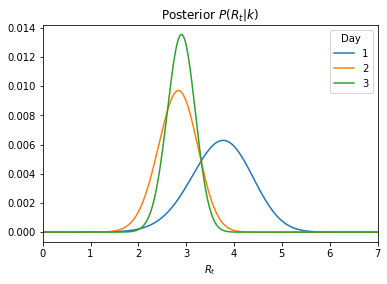

In [17]:
posteriors = likelihood_r_t.cumprod(axis=1)
posteriors = posteriors / np.sum(posteriors, axis=0)

columns = pd.Index(range(1, posteriors.shape[1]+1), name='Day')
posteriors = pd.DataFrame(
    data = posteriors,
    index = r_t_range,
    columns = columns)

ax = posteriors.plot(
    title='Posterior $P(R_t|k)$',
    xlim=(0,7)
)
ax.legend(title='Day')
ax.set_xlabel('$R_t$');

In [18]:
most_likely_values = posteriors.idxmax(axis=0)
most_likely_values

Day
1    3.77
2    2.84
3    2.90
dtype: float64

In [19]:
def highest_density_interval(pmf, p=.9):
    # If we pass a DataFrame, just call this recursively on the columns
    if(isinstance(pmf, pd.DataFrame)):
        return pd.DataFrame([highest_density_interval(pmf[col], p=p) for col in pmf], index=pmf.columns)
    
    cumsum = np.cumsum(pmf.values)
    best = None
    for i, value in enumerate(cumsum):
        for j, high_value in enumerate(cumsum[i+1:]):
            if (high_value-value > p) and (not best or j<best[1]-best[0]):
                best = (i, i+j+1)
                break
    #new condition:
    #if no values has been found so far, and cumsum[0] is already above 1-p
    #the first term of the tuple is the index cumsum[0], i.e. 0
    #the second term of the tuple is the very first that reaches 1.0 in the cumulative term
 
    if (best == None) and ((1. - p) < cumsum[0]):
        for j, high_value in enumerate(cumsum[1:]):
            if high_value == 1.:
                best = (0, j+1)
                break
    #sometimes R_t estimate can be bugged and CI overestimated, therefore take the pair of values that
    #have the same values
    if (best == None) and (cumsum[-1] < 1):
        for j, high_value in enumerate(cumsum[1:]):
            if (cumsum[j+2]-cumsum[j+1] == 0.):
                best = (0, j+1)
                break
                
    low = pmf.index[best[0]]
    high = pmf.index[best[1]]
    return pd.Series([low, high], index=[f'Low_{p*100:.0f}', f'High_{p*100:.0f}'])

hdi = highest_density_interval(posteriors)
hdi.tail()

,Low_90,High_90
Day,,
1,2.69,4.78
2,2.17,3.53
3,2.41,3.38


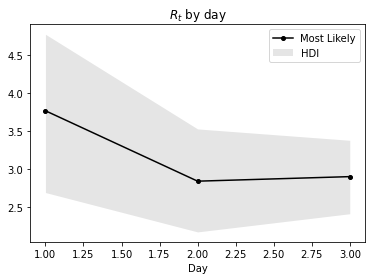

In [20]:
ax = most_likely_values.plot(marker='o',
                             label='Most Likely',
                             title=f'$R_t$ by day',
                             c='k',
                             markersize=4)

ax.fill_between(hdi.index,
                hdi['Low_90'],
                hdi['High_90'],
                color='k',
                alpha=.1,
                lw=0,
                label='HDI')

ax.legend()

In [21]:
states = pd.read_csv('y.csv',
                     usecols=[1,2,3],
                     index_col=['administrative_area_level_1', 'date'], 
                     parse_dates=['date'], squeeze=True).sort_index()
                    

In [22]:
states.tail()

administrative_area_level_1  date      
Italy                        2021-12-28     598868.0
                             2021-12-29     674865.0
                             2021-12-30     779463.0
                             2021-12-31     900984.0
                             2022-01-01    1021697.0
Name: infected, dtype: float64

False False


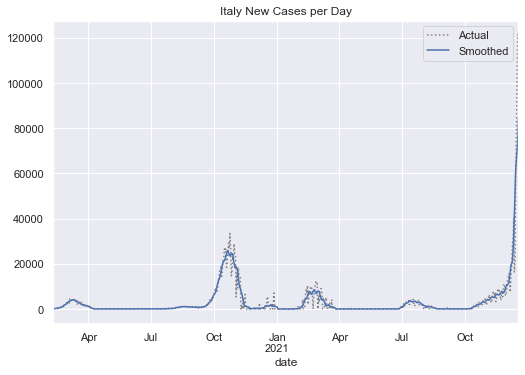

In [35]:
state_name = 'Italy'

def prepare_cases(cases):

    cases=cases.shift(-14, freq='D')
    
    #need the total cases
    new_cases = cases.diff()
        
#     #there is a drop in some databases of number of cumulated infected, therefore we observe a .diff()
#     #that is negative. So everything that is negative, we set it to 0. to do not break the program
    new_cases[new_cases < 0.] = 0.
    
    smoothed = new_cases.rolling(10,
        win_type='gaussian',
        min_periods=1,
        center=True).mean(std=25).round()
    
    zeros = smoothed.index[smoothed.eq(0)|smoothed.isnull()]
    if len(zeros) == 0:
        idx_start = 0
    else:
#         last_zero = zeros.max()
#         idx_start = smoothed.index.get_loc(last_zero) + 1
        idx_start = 0
#     smoothed = smoothed.fillna(0).iloc[idx_start:]
    original = new_cases.fillna(0).loc[smoothed.index]
    smoothed = smoothed.iloc[idx_start:]
#     original = new_cases.loc[smoothed.index]
    
    return original, smoothed

cases = states.xs(state_name).rename(f"{state_name} cases")

original, smoothed = prepare_cases(cases)

print(original.isnull().any(), smoothed.isnull().any())

original.plot(title=f"{state_name} New Cases per Day",
               c='k',
               linestyle=':',
               alpha=.5,
               label='Actual',
               legend=True,
             figsize=(600/72, 400/72))

ax = smoothed.plot(label='Smoothed',
                   legend=True)
ax.get_figure().set_facecolor('w')

In [36]:
def get_posteriors(sr, window=10, min_periods=1):
    cols = sr.index
    lam = sr[:-1].values * np.exp(GAMMA * (r_t_range[:, None] - 1))

    # Note: if you want to have a Uniform prior you can use the following line instead.
    # I chose the gamma distribution because of our prior knowledge of the likely value
    # of R_t.
    
    # prior0 = np.full(len(r_t_range), np.log(1/len(r_t_range)))
    prior0 = np.log(sps.gamma(a=3).pdf(r_t_range) + 1e-14)

    likelihoods = pd.DataFrame(
        # Short-hand way of concatenating the prior and likelihoods
        data = np.c_[prior0, sps.poisson.pmf(sr[1:].values, lam)],
        index = r_t_range,
        columns = sr.index)

    # Perform a rolling sum of log likelihoods. This is the equivalent
    # of multiplying the original distributions. Exponentiate to move
    # out of log.
    posteriors = likelihoods.rolling(window,
                                     axis=1,
                                     min_periods=min_periods).sum()
    posteriors = np.exp(posteriors)

    # Normalize to 1.0
    posteriors = posteriors.div(posteriors.sum(axis=0), axis=1)
    
    return posteriors

posteriors = get_posteriors(smoothed)
posteriors.isnull().any().unique()

array([False])

In [37]:
posteriors

date,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,...,2021-12-09,2021-12-10,2021-12-11,2021-12-12,2021-12-13,2021-12-14,2021-12-15,2021-12-16,2021-12-17,2021-12-18
0.00,1.000520e-16,9.949375e-17,9.902653e-17,9.869195e-17,9.831550e-17,9.797849e-17,9.765548e-17,9.736401e-17,9.713736e-17,9.695157e-17,...,0.000832,0.000832,0.000832,0.000832,0.000833,0.000833,0.000833,0.000833,0.000833,0.000833
0.01,4.952825e-07,4.925191e-07,4.902063e-07,4.885508e-07,4.866873e-07,4.850190e-07,4.834200e-07,4.819772e-07,4.808552e-07,4.799355e-07,...,0.000832,0.000832,0.000832,0.000832,0.000833,0.000833,0.000833,0.000833,0.000833,0.000833
0.02,1.961417e-06,1.950475e-06,1.941316e-06,1.934763e-06,1.927383e-06,1.920777e-06,1.914444e-06,1.908730e-06,1.904287e-06,1.900645e-06,...,0.000832,0.000832,0.000832,0.000832,0.000833,0.000833,0.000833,0.000833,0.000833,0.000833
0.03,4.369277e-06,4.344906e-06,4.324502e-06,4.309915e-06,4.293475e-06,4.278758e-06,4.264652e-06,4.251923e-06,4.242025e-06,4.233912e-06,...,0.000832,0.000832,0.000832,0.000832,0.000833,0.000833,0.000833,0.000833,0.000833,0.000833
0.04,7.690315e-06,7.647425e-06,7.611514e-06,7.585856e-06,7.556920e-06,7.531017e-06,7.506189e-06,7.483785e-06,7.466364e-06,7.452084e-06,...,0.000832,0.000832,0.000832,0.000832,0.000833,0.000833,0.000833,0.000833,0.000833,0.000833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11.96,4.576108e-06,4.550552e-06,4.529183e-06,4.513831e-06,4.496613e-06,4.481200e-06,4.466426e-06,4.453095e-06,4.442729e-06,4.434232e-06,...,0.000832,0.000832,0.000832,0.000832,0.000833,0.000833,0.000833,0.000833,0.000833,0.000833
11.97,4.538154e-06,4.512811e-06,4.491619e-06,4.476394e-06,4.459319e-06,4.444033e-06,4.429382e-06,4.416162e-06,4.405882e-06,4.397455e-06,...,0.000832,0.000832,0.000832,0.000832,0.000833,0.000833,0.000833,0.000833,0.000833,0.000833
11.98,4.500509e-06,4.475376e-06,4.454360e-06,4.439261e-06,4.422328e-06,4.407169e-06,4.392639e-06,4.379529e-06,4.369334e-06,4.360977e-06,...,0.000832,0.000832,0.000832,0.000832,0.000833,0.000833,0.000833,0.000833,0.000833,0.000833
11.99,4.463170e-06,4.438245e-06,4.417403e-06,4.402430e-06,4.385637e-06,4.370604e-06,4.356195e-06,4.343194e-06,4.333083e-06,4.324796e-06,...,0.000832,0.000832,0.000832,0.000832,0.000833,0.000833,0.000833,0.000833,0.000833,0.000833


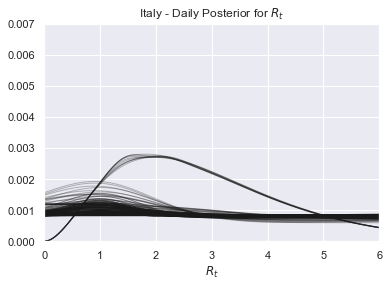

In [38]:
ax = posteriors.plot(title=f'{state_name} - Daily Posterior for $R_t$',
           legend=False, 
           lw=1,
           c='k',
           alpha=.3,
           xlim=(0,6),
           ylim=(0,0.007))

ax.set_xlabel('$R_t$');

In [39]:
# Note that this takes a while to execute - it's not the most efficient algorithm
hdis = highest_density_interval(posteriors)

most_likely = posteriors.idxmax().rename('ML')

# Look into why you shift -1
result = pd.concat([most_likely, hdis], axis=1)

result

,ML,Low_90,High_90
date,,,
2020-02-10,2.00,0.50,5.54
2020-02-11,1.93,0.50,5.53
2020-02-12,2.07,0.49,5.51
2020-02-13,2.07,0.46,5.47
2020-02-14,2.05,0.49,5.50
...,...,...,...
2021-12-14,1.66,1.19,12.00
2021-12-15,1.72,1.19,12.00
2021-12-16,1.72,1.19,12.00


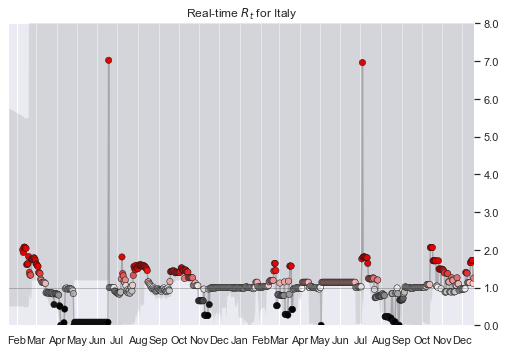

In [40]:
def plot_rt(result, ax, state_name):
    
    ax.set_title(f"{state_name}")
    
    # Colors
    ABOVE = [1,0,0]
    MIDDLE = [1,1,1]
    BELOW = [0,0,0]
    cmap = ListedColormap(np.r_[
        np.linspace(BELOW,MIDDLE,25),
        np.linspace(MIDDLE,ABOVE,25)
    ])
    color_mapped = lambda y: np.clip(y, .5, 1.5)-.5
    
    index = result['ML'].index.get_level_values('date')
    values = result['ML'].values
    
    # Plot dots and line
    ax.plot(index, values, c='k', zorder=1, alpha=.25)
    ax.scatter(index,
               values,
               s=40,
               lw=.5,
               c=cmap(color_mapped(values)),
               edgecolors='k', zorder=2)
    
    # Aesthetically, extrapolate credible interval by 1 day either side
    lowfn = interp1d(date2num(index),
                     result['Low_90'].values,
                     bounds_error=False,
                     fill_value='extrapolate')
    
    highfn = interp1d(date2num(index),
                      result['High_90'].values,
                      bounds_error=False,
                      fill_value='extrapolate')
    
    extended = pd.date_range('2020-01-21',
                             end=index[-1]+pd.Timedelta(days=1))
    
    ax.fill_between(extended,
                    lowfn(date2num(extended)),
                    highfn(date2num(extended)),
                    color='k',
                    alpha=.1,
                    lw=0,
                    zorder=3)

    ax.axhline(1.0, c='k', lw=1, label='$R_t=1.0$', alpha=.25);
    
    # Formatting
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax.xaxis.set_minor_locator(mdates.DayLocator())
    
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}"))
    ax.yaxis.tick_right()
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.margins(0)
    ax.grid(which='major', axis='y', c='k', alpha=.1, zorder=-2)
    ax.margins(0)
    ax.set_ylim(0.0, 8.0)
    ax.set_xlim(pd.Timestamp('2020-01-21'), result.index.get_level_values('date')[-1]+pd.Timedelta(days=1))
    fig.set_facecolor('w')

    
fig, ax = plt.subplots(figsize=(600/72,400/72))

plot_rt(result, ax, state_name)
ax.set_title(f'Real-time $R_t$ for {state_name}')
ax.xaxis.set_major_locator(mdates.MonthLocator())

plt.show()
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

In [41]:
result

,ML,Low_90,High_90
date,,,
2020-02-10,2.00,0.50,5.54
2020-02-11,1.93,0.50,5.53
2020-02-12,2.07,0.49,5.51
2020-02-13,2.07,0.46,5.47
2020-02-14,2.05,0.49,5.50
...,...,...,...
2021-12-14,1.66,1.19,12.00
2021-12-15,1.72,1.19,12.00
2021-12-16,1.72,1.19,12.00


In [42]:
x = pd.read_csv("owid-covid-data.csv", 
                   index_col='date',
                   parse_dates=True)
x

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-02-24,AFG,Asia,Afghanistan,5.0,5.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-25,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-26,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-27,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-28,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,ZWE,Africa,Zimbabwe,205449.0,1098.0,1481.429,4908.0,17.0,14.714,13612.952,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
2021-12-28,ZWE,Africa,Zimbabwe,207548.0,2099.0,1397.143,4940.0,32.0,17.286,13752.031,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
2021-12-29,ZWE,Africa,Zimbabwe,207548.0,0.0,1163.429,4940.0,0.0,16.000,13752.031,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [43]:
x = x.filter(["location","date","reproduction_rate"], axis=1)
x

,location,reproduction_rate
date,,
2020-02-24,Afghanistan,NaN
2020-02-25,Afghanistan,NaN
2020-02-26,Afghanistan,NaN
2020-02-27,Afghanistan,NaN
2020-02-28,Afghanistan,NaN
...,...,...
2021-12-27,Zimbabwe,0.87
2021-12-28,Zimbabwe,NaN
2021-12-29,Zimbabwe,NaN


In [44]:
x = x[x.location=='Italy']
x

,location,reproduction_rate
date,,
2020-01-31,Italy,NaN
2020-02-01,Italy,NaN
2020-02-02,Italy,NaN
2020-02-03,Italy,NaN
2020-02-04,Italy,NaN
...,...,...
2021-12-27,Italy,1.39
2021-12-28,Italy,NaN
2021-12-29,Italy,NaN


In [45]:
sns.set()

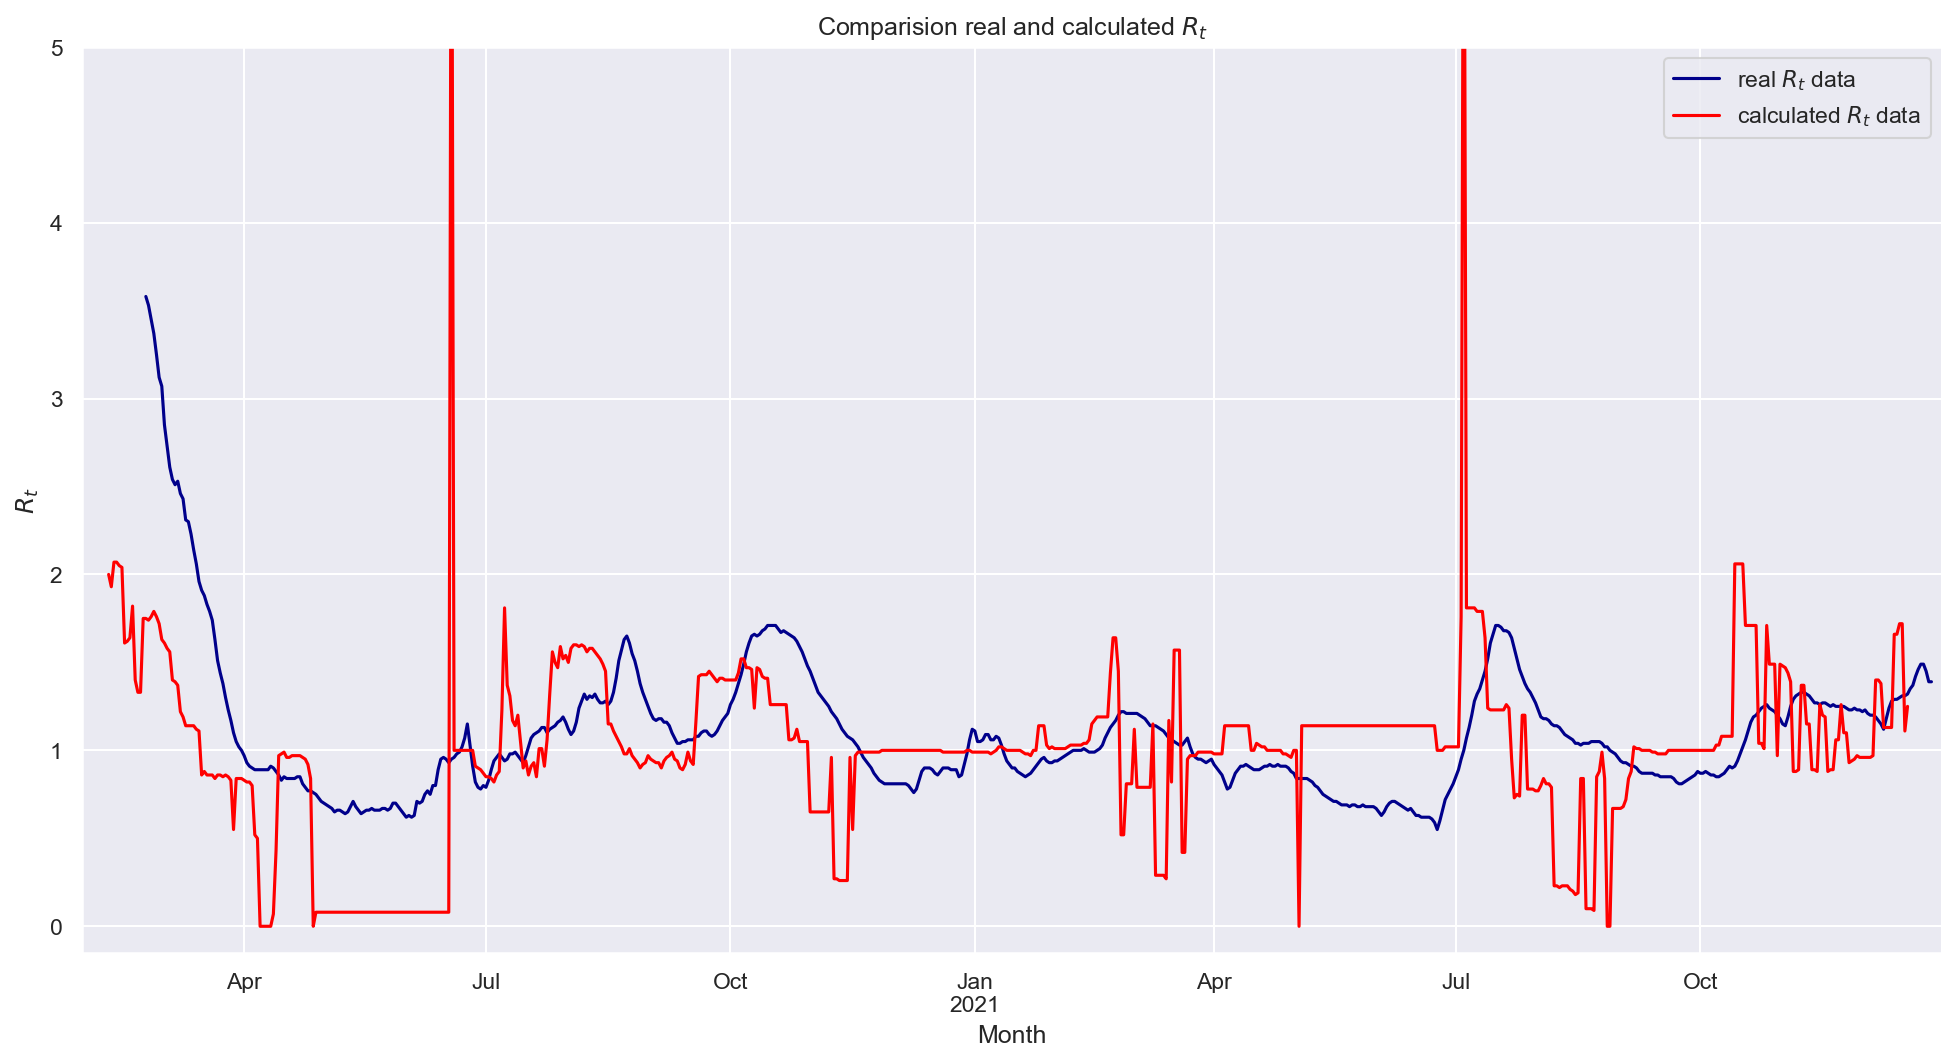

In [46]:
plt.figure(figsize=(16, 8), dpi=150)

x['reproduction_rate'].plot(label='real $R_t$ data',color = 'darkblue')
result['ML'].plot(label='calculated $R_t$ data',color = 'red')
plt.title('Comparision real and calculated $R_t$')
plt.xlabel('Month')
plt.ylabel('$R_t$')
plt.ylim(-0.15,5)
plt.legend()
plt.savefig('R_t')

-------------------------------------------------------------------------------------------------------------